# Introduction to Artificial Neural Network

## From Biological to Artificial Neural Network

### The Perceptron
The Perceptron is one of the simplest ANN architectures, invented in 1957 by Frank Rosenblatt. It is based on a slightly different artificial neuron called a ***threshold logic unit (TLU)***, or sometimes a ***linear threshold unit (LTU)***. The inputs and output are numbers (instead of binary on/off values), and each input connection is associated with a weight. The TLU computes a weighted sum of its inputs $(z = w_1 x_1 + w_2 x_2 + ... + w_n x_n = x^T w)$, then applies a step function to that sum and outputs the result: $h_w(x) = step(z)$, where $z = x^T w$.

A Perceptron is simply composed of a single layer of TLUs, with each TLU connected to all the inputs. When all the neurons in a layer are connected to every neuron in the previous layer (i.e., its input neurons), the layer is called a ***fully connected layer***, or a ***dense layer***. The inputs of the Perceptron are fed to special passthrough neurons called input neurons: they output whatever input they are fed. All the input neurons form the input layer. Moreover, an extra bias feature is generally added (x0 = 1): it is typically represented using a special type of neuron called a ***bias neuron***, which outputs 1 all the time.

***Computing the outputs of a fully connected layer***<br>
$h_{w, b} = \phi(XW + b)$

Where -
* $X$ is input features matrix
* $W$ is weight matrix
* $B$ is bias
* $\phi$ is activation function

So, how is a Perceptron trained? The Perceptron training algorithm proposed by Rosenblatt was largely inspired by Hebb’s rule. Donald Hebb suggested that when a biological neuron triggers another neuron often, the connection between these two neurons grows stronger. Siegrid Löwel later summarized Hebb’s idea in the catchy phrase, “Cells that fire together, wire together”; that is, the connection weight between two neurons tends to increase when they fire simultaneously. This rule later became known as Hebb’s rule (or Hebbian learning).

***Perceptron Learning Rule (weight update)***<br>
$w_{i, j}^{next step} = w_{i, j} + \eta(y_j - \hat{y}_j)x_i$

where-
* $w_{i, j}$ is connection bw ith input and jth output neuron
* $x_i$ is the ith input value of current training instance
* $\hat{y}_j$ is the output of jth neuron for current training instance
* $y_j$ is the target output of the jth output neuron for the current training instance
* $\eta$ is learning rate

The decision boundary of each output neuron is linear, so Perceptrons are incapable of learning complex patterns (just like Logistic Regression classifiers). However, if the training instances are linearly separable, Rosenblatt demonstrated that this algorithm would converge to a solution. This is called the ***Perceptron convergence theorem***.

Let's have a look



In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)] # petal length, petal width
y = (iris.target == 0).astype(np.int) # Iris setosa?

In [2]:
# creating and training perceptron
per_clf = Perceptron()
per_clf.fit(X, y)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [3]:
# predicting
y_pred = per_clf.predict([[2, 0.5]])
y_pred

array([0])

Perceptron learning algorithm strongly resembles Stochastic Gradient Descent. In fact, Scikit-Learn’s Perceptron class is equivalent to using an SGDClassifier with the following hyperparameters: loss="perceptron", learning_rate="constant", eta0=1 (the learning rate), and penalty=None (no regularization).

Contrary to Logistic Regression classifiers, Perceptrons do not output a class probability; rather, they make predictions based on a hard threshold. This is one reason to prefer Logistic Regression over Perceptrons.


### MLP and Backpropagation
An MLP is composed of one (passthrough) input layer, one or more layers of TLUs, called hidden layers, and one final layer of TLUs called the output layer. The layers close to the input layer are usually called the lower layers, and the ones close to the outputs are usually called the upper layers.

When an ANN contains a deep stack of hidden layers, it is called a deep neural network (DNN). The field of Deep Learning studies DNNs, and more generally models containing deep stacks of computations.

For many years researchers struggled to find a way to train MLPs, without success. But in 1986, David Rumelhart, Geoffrey Hinton, and Ronald Williams published a [groundbreaking paper](homl.info/44) that introduced the backpropagation training algorithm, which is still used today. In short, it is Gradient Descent using an efficient technique for computing the gradients automatically:11 in just two passes through the network (one forward, one backward), the backpropagation algorithm is able to compute the gradient of the network’s error with regard to every single model parameter. In other words, it can find out how each connection weight and each bias term should be tweaked in order to reduce the error. Once it has these gradients, it just performs a regular Gradient Descent step, and the whole process is repeated until the network converges to the solution.

In order for this algorithm to work properly, its authors made a key change to the MLP’s architecture: they replaced the step function with the logistic (sigmoid) function, $σ(z) = \frac{1}{1 + exp(–z)}$. This was essential because the step function contains only flat segments, so there is no gradient to work with (Gradient Descent cannot move on a flat surface), while the logistic function has a well-defined nonzero derivative everywhere, allowing Gradient Descent to make some progress at every step. In fact, the backpropagation algorithm works well with many other activation functions, not just the logistic function. Here are two other popular choices:

* ***The hyperbolic tangent function: $tanh(z) = 2σ(2z) – 1$*** - Just like the logistic function, this activation function is S-shaped, continuous, and differentiable, but its output value ranges from –1 to 1 (instead of 0 to 1 in the case of the logistic function). That range tends to make each layer’s output more or less centered around 0 at the beginning of training, which often helps speed up convergence.

* ***The Rectified Linear Unit function: $ReLU(z) = max(0, z)$*** - The ReLU function is continuous but unfortunately not differentiable at z = 0 (the slope changes abruptly, which can make Gradient Descent bounce around), and its derivative is 0 for z < 0. In practice, however, it works very well and has the advantage of being fast to compute, so it has become the default. Most importantly, the fact that it does not have a maximum output value helps reduce some issues during Gradient Descent.

Why do we need activation functions in the first place? Well, if you chain several linear transformations, all you get is a linear transformation. For example, if $f(x) = 2x + 3$ and $g(x) = 5x – 1$, then chaining these two linear functions gives you another linear function: $f(g(x)) = 2(5x – 1) + 3 = 10x + 1$. So if you don’t have some nonlinearity between layers, then even a deep stack of layers is equivalent to a single layer, and you can’t solve very complex problems with that. Conversely, a large enough DNN with nonlinear activations can theoretically approximate any continuous function.


### Regression MLPs

MLPs can be used for regression tasks. If you want to predict a single value (e.g., the price of a house, given many of its features), then you just need a single output neuron: its output is the predicted value. For multivariate regression (i.e., to predict multiple values at once), you need one output neuron per output dimension.

The loss function to use during training is typically the mean squared error, but if you have a lot of outliers in the training set, you may prefer to use the mean absolute error instead. Alternatively, you can use the Huber loss, which is a combination of both.

### Classification MLPs

MLPs can also be used for classification tasks. For a binary classification problem, you just need a single output neuron using the logistic activation function: the output will be a number between 0 and 1, which you can interpret as the estimated probability of the positive class. The estimated probability of the negative class is equal to one minus that number.

MLPs can also easily handle multilabel binary classification tasks. For example, you could have an email classification system that predicts whether each incoming email is ham or spam, and simultaneously predicts whether it is an urgent or nonurgent email. In this case, you would need two output neurons, both using the logistic activation function: the first would output the probability that the email is spam, and the second would output the probability that it is urgent. More generally, you would dedicate one output neuron for each positive class. Note that the output probabilities do not necessarily add up to 1. This lets the model output any combination of labels: you can have nonurgent ham, urgent ham, nonurgent spam, and perhaps even urgent spam (although that would probably be an error).

If each instance can belong only to a single class, out of three or more possible classes (e.g., classes 0 through 9 for digit image classification), then you need to have one output neuron per class, and you should use the softmax activation function for the whole output layer. The softmax function will ensure that all the estimated probabilities are between 0 and 1 and that they add up to 1 (which is required if the classes are exclusive). This is called multiclass classification.

## Implementing MLP in Keras



### Building an Image Classifier Using the Sequential API

Here we will tackle Fashion MNIST. It has the exact same format as MNIST (70,000 grayscale images of 28 × 28 pixels each, with 10 classes), but the images represent fashion items rather than handwritten digits, so each class is more diverse, and the problem turns out to be significantly more challenging than MNIST.



In [4]:
import tensorflow as tf
import keras

Using TensorFlow backend.


#### Loading data

In [5]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
print(f"X_train_full.shape - {X_train_full.shape}")
print(f"y_train_full.shape - {y_train_full.shape}")
print(f"X_test.shape - {X_test.shape}")
print(f"y_test.shape - {y_test.shape}")

4423680/4422102 [==============================] - 0s 0us/step
X_train_full.shape - (60000, 28, 28)
y_train_full.shape - (60000,)
X_test.shape - (10000, 28, 28)
y_test.shape - (10000,)


The dataset is already split into a training set and a test set, but there is no validation set, so we’ll create one now. Additionally, since we are going to train the neural network using Gradient Descent, we must scale the input features. For simplicity, we’ll scale the pixel intensities down to the 0–1 range by dividing them by 255.0 (this also converts them to floats):

In [6]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [7]:
# class names
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", 
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
          

Coat


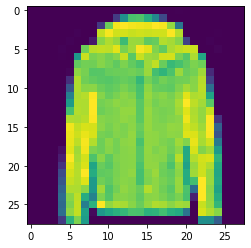

In [8]:
# check 1st example
import matplotlib.pyplot as plt

print(class_names[y_train[0]]     )
plt.imshow(X_train[0])

#### Creating Model

In [9]:
# creating model using sequential API
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_2 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [10]:
# another way
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_5 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [11]:
# access model layers
model.layers

In [12]:
# get model layer
hidden1 = model.layers[1]
print(hidden1.name)

dense_4


In [13]:
weights, biases = hidden1.get_weights()
print(weights.shape)
print(biases.shape)

(784, 300)
(300,)


In [14]:
weights

array([[ 0.04407284,  0.04791442,  0.00694428, ...,  0.07082225,
         0.01623923,  0.03498274],
       [-0.06899786, -0.06625619,  0.07091267, ..., -0.01564338,
         0.019649  ,  0.02695377],
       [-0.01397872, -0.03017611,  0.01725819, ...,  0.03885771,
         0.02542134, -0.05851365],
       ...,
       [-0.027394  , -0.02100584,  0.01041127, ..., -0.05601118,
         0.00650506, -0.03630669],
       [-0.05497999,  0.06816782,  0.04407532, ..., -0.03845143,
         0.04408857,  0.07382588],
       [ 0.02215005,  0.00708732, -0.0164591 , ...,  0.04777616,
        -0.01970708, -0.03581548]], dtype=float32)

The Dense layer initialized the connection weights randomly, and the biases were initialized to zeros, which is fine. If you ever want to use a different initialization method, you can set kernel_initializer (kernel is another name for the matrix of connection weights) or bias_initializer when creating the layer.

#### Compiling Model

In [15]:
# compiling the model
model.compile(loss="sparse_categorical_crossentropy", 
              optimizer="sgd", 
              metrics=["accuracy"])

We use the "sparse_categorical_cross entropy" loss because we have sparse labels (i.e., for each instance, there is just a target class index, from 0 to 9 in this case), and the classes are exclusive. If instead we had one target probability per class for each instance (such as one-hot vectors, e.g. [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.] to represent class 3), then we would need to use the "categorical_crossentropy" loss instead. If we were doing binary classification (with one or more binary labels), then we would use the "sigmoid" (i.e., logistic) activation function in the output layer instead of the "softmax" activation function, and we would use the "binary_crossentropy" loss. 

NOTE: When using the SGD optimizer, it is important to tune the learning rate. So, you will generally want to use optimizer=keras.optimiz ers.SGD(lr=???) to set the learning rate, rather than opti mizer="sgd", which defaults to lr=0.01.

#### Training Model

In [16]:
# training a model
history = model.fit(X_train, y_train, 
                    epochs=30, 
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 8s 144us/step - loss: 0.7349 - accuracy: 0.7588 - val_loss: 0.5090 - val_accuracy: 0.8334
Epoch 2/30
55000/55000 [==============================] - 6s 106us/step - loss: 0.4955 - accuracy: 0.8280 - val_loss: 0.4684 - val_accuracy: 0.8364
Epoch 3/30
55000/55000 [==============================] - 6s 107us/step - loss: 0.4490 - accuracy: 0.8425 - val_loss: 0.4223 - val_accuracy: 0.8558
Epoch 4/30
55000/55000 [==============================] - 6s 105us/step - loss: 0.4210 - accuracy: 0.8514 - val_loss: 0.4084 - val_accuracy: 0.8586
Epoch 5/30
55000/55000 [==============================] - 6s 106us/step - loss: 0.3986 - accuracy: 0.8592 - val_loss: 0.3871 - val_accuracy: 0.8666
Epoch 6/30
55000/55000 [==============================] - 6s 105us/step - loss: 0.3824 - accuracy: 0.8661 - val_loss: 0.3870 - val_accuracy: 0.8644
Epoch 7/30
55000/55000 [==============================] - 6s 10

In [17]:
# evaluating model
print(model.evaluate(X_train, y_train))
print(model.evaluate(X_valid, y_valid))

55000/55000 [==============================] - 4s 68us/step
[0.21797753107764503, 0.9216181635856628]
5000/5000 [==============================] - 0s 65us/step
[0.2974189668267965, 0.8916000127792358]


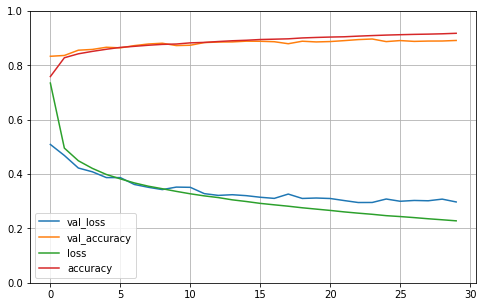

In [18]:
# plotting training results
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

You can see that both the training accuracy and the validation accuracy steadily increase during training, while the training loss and the validation loss decrease. Good! Moreover, the validation curves are close to the training curves, which means that there is not too much overfitting. In this particular case, the model looks like it performed better on the validation set than on the training set at the beginning of training. But that’s not the case: indeed, the validation error is computed at the end of each epoch, while the training error is computed using a running mean during each epoch. So the training curve should be shifted by half an epoch to the left. If you do that, you will see that the training and validation curves overlap almost perfectly at the beginning of training.

The training set performance ends up beating the validation performance, as is generally the case when you train for long enough. You can tell that the model has not quite converged yet, as the validation loss is still going down, so you should probably continue training. It’s as simple as calling the fit() method again, since Keras just continues training where it left off (you should be able to reach close to 89% validation accuracy).

f you are not satisfied with the performance of your model, you should go back and tune the hyperparameters. The first one to check is the learning rate. If that doesn’t help, try another optimizer (and always retune the learning rate after changing any hyperparameter). If the performance is still not great, then try tuning model hyperparameters such as the number of layers, the number of neurons per layer, and the types of activation functions to use for each hidden layer. You can also try tuning other hyperparameters, such as the batch size (it can be set in the fit() method using the batch_size argument, which defaults to 32). 

It is common to get slightly lower performance on the test set than on the validation set, because the hyperparameters are tuned on the validation set, not the test set (however, in this example, we did not do any hyperparameter tuning, so the lower accuracy is just bad luck). Remember to resist the temptation to tweak the hyperparameters on the test set, or else your estimate of the generalization error will be too optimistic.

#### Making Predictions

In [19]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

If you only care about the class with the highest estimated probability (even if that probability is quite low), then you can use the predict_classes() method instead:

In [20]:
import numpy as np

y_pred = model.predict_classes(X_new)
print(f"Predictions - {y_pred}")
print(f"Predicted classes - {np.array(class_names)[y_pred]}")
print(f"Actual classes - {np.array(class_names)[y_test[:3]]}")

Predictions - [9 2 1]
Predicted classes - ['Ankle boot' 'Pullover' 'Trouser']
Actual classes - ['Ankle boot' 'Pullover' 'Trouser']


### Building a Regression MLP Using the Sequential API
Let’s switch to the California housing problem and tackle it using a regression neural network. For simplicity, we will use Scikit-Learn’s fetch_california_housing() function to load the data. After loading the data, we split it into a training set, a validation set, and a test set, and we scale all the features:

#### Loading and prep data

In [21]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

#### Build, compile, train, evaluate and test model

In [22]:
# build model
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

# compile model
model.compile(loss="mean_squared_error", optimizer="sgd")

# train model
history = model.fit(X_train, y_train, 
                    epochs=20, 
                    validation_data=(X_valid, y_valid), 
                    verbose=0) # silent training

# evaluate model
print(f"MSE - {model.evaluate(X_test, y_test)}")

# get predictions
y_pred = model.predict(X_test[:3])
print(f"Predictions - {y_pred}")
print(f"Actual Vals - {y_test[:3]}")

5160/5160 [==============================] - 0s 37us/step
MSE - 0.34117018390995585
Predictions - [[1.2308105]
 [2.3724523]
 [2.9295025]]
Actual Vals - [1.516 1.919 3.118]


## Building Complex Models Using the Functional API

One example of a nonsequential neural network is a Wide & Deep neural network. This neural network architecture was introduced in a 2016 paper by Heng-Tze Cheng et al. It connects all or part of the inputs directly to the output layer. This architecture makes it possible for the neural network to learn both deep patterns (using the deep path) and simple rules (through the short path). In contrast, a regular MLP forces all the data to flow through the full stack of layers; thus, simple patterns in the data may end up being distorted by this sequence of transformations.

Let’s build such a neural network to tackle the California housing problem:

In [23]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 8)            0                                            
__________________________________________________________________________________________________
dense_9 (Dense)                 (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_10 (Dense)                (None, 30)           930         dense_9[0][0]                    
__________________________________________________________________________________________________
concatenate_1 (Concatenate)     (None, 38)           0           input_1[0][0]                    
                                                                 dense_10[0][0]             

Once you have built the Keras model, everything is exactly like earlier, so there’s no need to repeat it here: you must compile the model, train it, evaluate it, and use it to make predictions.

But what if you want to send a subset of the features through the wide path and a different subset (possibly overlapping) through the deep path? In this case, one solution is to use multiple inputs. For example, suppose we want to send five features through the wide path (features 0 to 4), and six features through the deep path (features 2 to 7):

In [24]:
# create layers
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)

# build model
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
deep_input (InputLayer)         (None, 6)            0                                            
__________________________________________________________________________________________________
dense_12 (Dense)                (None, 30)           210         deep_input[0][0]                 
__________________________________________________________________________________________________
wide_input (InputLayer)         (None, 5)            0                                            
__________________________________________________________________________________________________
dense_13 (Dense)                (None, 30)           930         dense_12[0][0]                   
____________________________________________________________________________________________

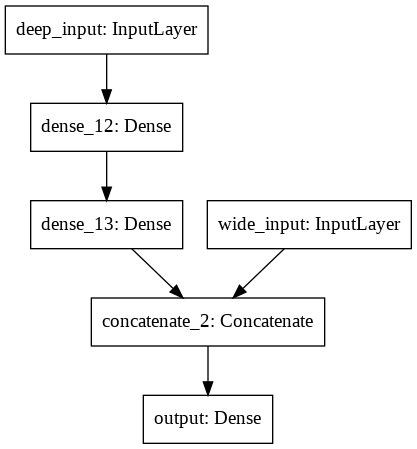

In [25]:
# plot model
tf.keras.utils.plot_model(model)

The code is self-explanatory. You should name at least the most important layers, especially when the model gets a bit complex like this. Note that we specified inputs=[input_A, input_B] when creating the model. Now we can compile the model as usual, but when we call the fit() method, instead of passing a single input matrix X_train, we must pass a pair of matrices (X_train_A, X_train_B): one per input. The same is true for X_valid, and also for X_test and X_new when you call evaluate() or predict():

In [26]:
# compile model
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

In [27]:
# prep data
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

In [28]:
# train model
history = model.fit([X_train_A, X_train_B], y_train, 
                    epochs=20, 
                    validation_data=([X_valid_A, X_valid_B], y_valid), 
                    verbose=1)

print(f"MSE - {model.evaluate([X_test_A, X_test_B], y_test)}")
y_pred = model.predict([X_new_A, X_new_B])
print(f"Predictions - {y_pred}")
print(f"Actual - {y_test[:3]}")

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 97us/step - loss: 2.2943 - val_loss: 0.9358
Epoch 2/20
11610/11610 [==============================] - 1s 90us/step - loss: 0.7434 - val_loss: 0.6680
Epoch 3/20
11610/11610 [==============================] - 1s 93us/step - loss: 0.6270 - val_loss: 0.6001
Epoch 4/20
11610/11610 [==============================] - 1s 93us/step - loss: 0.5906 - val_loss: 0.5622
Epoch 5/20
11610/11610 [==============================] - 1s 91us/step - loss: 0.5684 - val_loss: 0.5425
Epoch 6/20
11610/11610 [==============================] - 1s 94us/step - loss: 0.5531 - val_loss: 0.5267
Epoch 7/20
11610/11610 [==============================] - 1s 95us/step - loss: 0.5381 - val_loss: 0.5114
Epoch 8/20
11610/11610 [==============================] - 1s 90us/step - loss: 0.5215 - val_loss: 0.4972
Epoch 9/20
11610/11610 [==============================] - 1s 91us/step - loss: 0.5114 - val_loss: 0.4912
Epoch 

Adding extra outputs is quite easy: just connect them to the appropriate layers and add them to your model’s list of outputs.

In [29]:
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
deep_input (InputLayer)         (None, 6)            0                                            
__________________________________________________________________________________________________
dense_12 (Dense)                (None, 30)           210         deep_input[0][0]                 
__________________________________________________________________________________________________
wide_input (InputLayer)         (None, 5)            0                                            
__________________________________________________________________________________________________
dense_13 (Dense)                (None, 30)           930         dense_12[0][0]                   
____________________________________________________________________________________________

Each output will need its own loss function. Therefore, when we compile the model, we should pass a list of losses (if we pass a single loss, Keras will assume that the same loss must be used for all outputs). By default, Keras will compute all these losses and simply add them up to get the final loss used for training. We care much more about the main output than about the auxiliary output (as it is just used for regularization), so we want to give the main output’s loss a much greater weight. Fortunately, it is possible to set all the loss weights when compiling the model:

In [30]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")

Now when we train the model, we need to provide labels for each output. In this example, the main output and the auxiliary output should try to predict the same thing, so they should use the same labels. So instead of passing y_train, we need to pass (y_train, y_train) 

In [31]:
# train model
history = model.fit([X_train_A, X_train_B], 
                    [y_train, y_train], 
                    epochs=20, 
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]), 
                    verbose=0)

In [32]:
# evaluate
total_loss, main_loss, aux_loss = model.evaluate([X_test_A, X_test_B], [y_test, y_test])
print(f"total_loss: {total_loss} \nmain_loss: {main_loss} \naux_loss: {aux_loss}")

5160/5160 [==============================] - 0s 62us/step
total_loss: 0.35381870766480766 
main_loss: 0.3388870358467102 
aux_loss: 0.4813053011894226


In [33]:
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])
print(f"y_pred_main: {y_pred_main} \ny_pred_aux: {y_pred_aux}")

y_pred_main: [[1.1140602]
 [2.2595751]
 [2.7978716]] 
y_pred_aux: [[1.7057779]
 [2.0408957]
 [2.86755  ]]


## Using the Subclassing API to Build Dynamic Models

Simply subclass the Model class, create the layers you need in the constructor, and use them to perform the computations you want in the call() method. For example, creating an instance of the following WideAndDeepModel class gives us an equivalent model to the one we just built with the Functional API. You can then compile it, evaluate it, and use it to make predictions, exactly like we just did:

In [34]:
class WideAndDeepModel(keras.Model):
    
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs) # handles standard args (e.g., name)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)

    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output


# model = WideAndDeepModel()

This example looks very much like the Functional API, except we do not need to create the inputs; we just use the input argument to the call() method, and we separate the creation of the layers21 in the constructor from their usage in the call() method. The big difference is that you can do pretty much anything you want in the call() method: for loops, if statements, low-level TensorFlow operations—your imagination is the limit.

This extra flexibility does come at a cost: your model’s architecture is hidden within the call() method, so Keras cannot easily inspect it; it cannot save or clone it; and when you call the summary() method, you only get a list of layers, without any information on how they are connected to each other. Moreover, Keras cannot check types and shapes ahead of time, and it is easier to make mistakes. So unless you really need that extra flexibility, you should probably stick to the Sequential API or the Functional API.

## Saving and Restoring a Model

When using the Sequential API or the Functional API, saving a trained Keras model is as simple as it gets:
```Python
model = keras.models.Sequential([...]) # or keras.Model([...])
model.compile([...])
model.fit([...])
model.save("my_keras_model.h5")
```

Keras will use the HDF5 format to save both the model’s architecture (including every layer’s hyperparameters) and the values of all the model parameters for every layer (e.g., connection weights and biases). It also saves the optimizer (including its hyperparameters and any state it may have). 


You will typically have a script that trains a model and saves it, and one or more scripts (or web services) that load the model and use it to make predictions. Loading the model is just as easy:

```Python
model = keras.models.load_model("my_keras_model.h5")
```

WARNING: This will work when using the Sequential API or the Functional API, but unfortunately not when using model subclassing. You can use save_weights() and load_weights() to at least save and restore the model parameters, but you will need to save and restore everything else yourself.

But what if training lasts several hours? This is quite common, especially when training on large datasets. In this case, you should not only save your model at the end of training, but also save checkpoints at regular intervals during training, to avoid losing everything if your computer crashes. But how can you tell the fit() method to save checkpoints? Use callbacks.


### Using Callbacks

The fit() method accepts a callbacks argument that lets you specify a list of objects that Keras will call at the start and end of training, at the start and end of each epoch, and even before and after processing each batch. For example, the ModelCheckpoint callback saves checkpoints of your model at regular intervals during training, by default at the end of each epoch:

```Python
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5")
history = model.fit(X_train, y_train, epochs=10, callbacks=[checkpoint_cb])
```

If you use a validation set during training, you can set save_best_only=True when creating the ModelCheckpoint. In this case, it will only save your model when its performance on the validation set is the best so far. This way, you do not need to worry about training for too long and overfitting the training set: simply restore the last model saved after training, and this will be the best model on the validation set. The following code is a simple way to implement early stopping:

```Python
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5",save_best_only=True)
history = model.fit(X_train, y_train, 
                    epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5") # roll back to best model
```

Another way to implement early stopping is to simply use the EarlyStopping callback. It will interrupt training when it measures no progress on the validation set for a number of epochs (defined by the patience argument), and it will optionally roll back to the best model. You can combine both callbacks to save checkpoints of your model (in case your computer crashes) and interrupt training early when there is no more progress (to avoid wasting time and resources):

```Python
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])
```

The number of epochs can be set to a large value since training will stop automatically when there is no more progress. In this case, there is no need to restore the best model saved because the EarlyStopping callback will keep track of the best weights and restore them for you at the end of training.


## Fine Tuning Neural Network

The flexibility of neural networks is also one of their main drawbacks: there are many hyperparameters to tweak. Not only can you use any imaginable network architecture, but even in a simple MLP you can change the number of layers, the number of neurons per layer, the type of activation function to use in each layer, the weight initialization logic, and much more. How do you know what combination of hyperparameters is the best for your task?

One option is to simply try many combinations of hyperparameters and see which one works best on the validation set (or use K-fold cross-validation). For example, we can use GridSearchCV or RandomizedSearchCV to explore the hyperparameter space. To do this, we need to wrap our Keras models in objects that mimic regular Scikit-Learn regressors. The first step is to create a function that will build and compile a Keras model, given a set of hyperparameters: 

In [35]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

This function creates a simple Sequential model for univariate regression (only one output neuron), with the given input shape and the given number of hidden layers and neurons, and it compiles it using an SGD optimizer configured with the specified learning rate. It is good practice to provide reasonable defaults to as many hyperparameters as you can, as Scikit-Learn does.

In [36]:
# create a KerasRegressor based on this build_model() function
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

The KerasRegressor object is a thin wrapper around the Keras model built using build_model(). Since we did not specify any hyperparameters when creating it, it will use the default hyperparameters we defined in build_model(). Now we can use this object like a regular Scikit-Learn regressor: we can train it using its fit() method, then evaluate it using its score() method, and use it to make predictions using its predict() method, as you can see in the following code:

In [37]:
keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 1s 83us/step - loss: 1.3851 - val_loss: 0.8391
Epoch 2/100
11610/11610 [==============================] - 1s 81us/step - loss: 0.6766 - val_loss: 1.0892
Epoch 3/100
11610/11610 [==============================] - 1s 85us/step - loss: 0.6191 - val_loss: 0.5781
Epoch 4/100
11610/11610 [==============================] - 1s 81us/step - loss: 0.5677 - val_loss: 0.5354
Epoch 5/100
11610/11610 [==============================] - 1s 79us/step - loss: 0.5235 - val_loss: 0.4827
Epoch 6/100
11610/11610 [==============================] - 1s 82us/step - loss: 0.4994 - val_loss: 0.5671
Epoch 7/100
11610/11610 [==============================] - 1s 83us/step - loss: 0.4786 - val_loss: 0.4462
Epoch 8/100
11610/11610 [==============================] - 1s 89us/step - loss: 0.4664 - val_loss: 0.4566
Epoch 9/100
11610/11610 [==============================] - 1s 91us/step - loss: 0.4547 - val_loss: 0.42

In [38]:
# check MSE
mse_test = keras_reg.score(X_test, y_test)
mse_test

5160/5160 [==============================] - 0s 36us/step


-0.34777579104253487

Any extra parameter you pass to the fit() method will get passed to the underlying Keras model. Also note that the score will be the opposite of the MSE because Scikit-Learn wants scores, not losses (i.e., higher should be better).

We don’t want to train and evaluate a single model like this, though we want to train hundreds of variants and see which one performs best on the validation set. Since there are many hyperparameters, it is preferable to use a randomized search rather than grid search.

In [39]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100),
    "learning_rate": reciprocal(3e-4, 3e-2),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] learning_rate=0.0015411627181247465, n_hidden=2, n_neurons=14 ...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 104us/step - loss: 1.9317 - val_loss: 1.0265
Epoch 2/100
7740/7740 [==============================] - 1s 92us/step - loss: 0.8064 - val_loss: 0.7994
Epoch 3/100
7740/7740 [==============================] - 1s 97us/step - loss: 0.7207 - val_loss: 0.7264
Epoch 4/100
7740/7740 [==============================] - 1s 94us/step - loss: 0.6832 - val_loss: 0.6797
Epoch 5/100
7740/7740 [==============================] - 1s 90us/step - loss: 0.6551 - val_loss: 0.6459
Epoch 6/100
7740/7740 [==============================] - 1s 94us/step - loss: 0.6314 - val_loss: 0.6195
Epoch 7/100
7740/7740 [==============================] - 1s 91us/step - loss: 0.6107 - val_loss: 0.5958
Epoch 8/100
7740/7740 [==============================] - 1s 96us/step - loss: 0.5910 - val_loss: 0.5764
Epoch 9/100
7740/7740 [==============================] - 1s 96us/step - loss: 0.5734 - val_loss: 0.5577
Epoch 10/100
77

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min remaining:    0.0s


Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 102us/step - loss: 2.2346 - val_loss: 2.9167
Epoch 2/100
7740/7740 [==============================] - 1s 97us/step - loss: 0.9466 - val_loss: 0.7951
Epoch 3/100
7740/7740 [==============================] - 1s 96us/step - loss: 0.7681 - val_loss: 0.7261
Epoch 4/100
7740/7740 [==============================] - 1s 97us/step - loss: 0.7163 - val_loss: 0.6861
Epoch 5/100
7740/7740 [==============================] - 1s 92us/step - loss: 0.6833 - val_loss: 0.6530
Epoch 6/100
7740/7740 [==============================] - 1s 99us/step - loss: 0.6571 - val_loss: 0.6208
Epoch 7/100
7740/7740 [==============================] - 1s 92us/step - loss: 0.6356 - val_loss: 0.6034
Epoch 8/100
7740/7740 [==============================] - 1s 91us/step - loss: 0.6173 - val_loss: 0.5866
Epoch 9/100
7740/7740 [==============================] - 1s 92us/step - loss: 0.6010 - val_loss: 0.5706
Epoch 10/100
77

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 22.3min finished


RuntimeError: ignored

RandomizedSearchCV uses K-fold cross-validation, so it does not use X_valid and y_valid, which are only used for early stopping.

The exploration may last many hours, depending on the hardware, the size of the dataset, the complexity of the model, and the values of n_iter and cv. When it’s over, you can access the best parameters found, the best score, and the trained Keras model like this:

In [40]:
# see best params
rnd_search_cv.best_params_

{'learning_rate': 0.011366299432595662, 'n_hidden': 2, 'n_neurons': 79}

In [41]:
# best scores
rnd_search_cv.best_score_

-0.3420590176215776

In [ ]:
# best model
model = rnd_search_cv.best_estimator_.model

There are many techniques to explore a search space much more efficiently than randomly. Their core idea is simple: when a region of the space turns out to be good, it should be explored more. Such techniques take care of the “zooming” process for you and lead to much better solutions in much less time. Here are some Python libraries you can use to optimize hyperparameters:

* **[Hyperopt](https://github.com/hyperopt/hyperopt)**
* **[Hyperas](https://github.com/maxpumperla/hyperas), [kopt](https://github.com/Avsecz/kopt), [Talos](https://github.com/autonomio/talos)**
* **[Keras Tuner](https://www.youtube.com/watch?v=Un0JDL3i5Hg&t=24s)**
* **[skopt](https://scikit-optimize.github.io/stable/)**
* **[Hyperband](https://github.com/zygmuntz/hyperband)**
* **[sklearn-deap](https://github.com/rsteca/sklearn-deap)**
* **[Spearmint](https://github.com/JasperSnoek/spearmint)**

Hyperparameter tuning is still an active area of research, and evolutionary algorithms are making a comeback. 

### Number of hidden layers
For many problems you can start with just one or two hidden layers and the neural network will work just fine. For instance, you can easily reach above 97% accuracy on the MNIST dataset using just one hidden layer with a few hundred neurons, and above 98% accuracy using two hidden layers with the same total number of neurons, in roughly the same amount of training time. For more complex problems, you can ramp up the number of hidden layers until you start overfitting the training set. Very complex tasks, such as large image classification or speech recognition, typically require networks with dozens of layers and they need a huge amount of training data. You will rarely have to train such networks from scratch: it is much more common to reuse parts of a pretrained state-of-the-art network that performs a similar task. Training will then be a lot faster and require much less data.

### Number of Neurons per Hidden Layer

The number of neurons in the input and output layers is determined by the type of input and output your task requires. For example, the MNIST task requires 28 × 28 = 784 input neurons and 10 output neurons. As for the hidden layers, it used to be common to size them to form a pyramid, with fewer and fewer neurons at each layer—the rationale being that many low-level features can coalesce into far fewer high-level features. A typical neural network for MNIST might have 3 hidden layers, the first with 300 neurons, the second with 200, and the third with 100. However, this practice has been largely abandoned because it seems that using the same number of neurons in all hidden layers performs just as well in most cases, or even better; plus, there is only one hyperparameter to tune, instead of one per layer. That said, depending on the dataset, it can sometimes help to make the first hidden layer bigger than the others.

***In general you will get more bang for your buck by increasing the number of layers instead of the number of neurons per layer.***